# TEDx

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
from urllib.request import urlretrieve
from IPython.display import clear_output
import cv2
from PIL import Image
from sklearn.metrics.cluster import entropy as sklearn_entropy
from skimage import io, color, img_as_ubyte
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
from textblob import TextBlob
import traceback
import json
import requests
import time
from bs4 import BeautifulSoup

Let's check how the DF looks

In [237]:
df = pd.read_excel("data/data_ted.xlsx")
df.head()

,Licensees.name,Events.name,Videos.id,Videos.videoid,Videos.title,Videos.url,Videos.url_img,Videos.description,Videos.published_at,Videos.channelid,Videos.channel_title,Videos.tags,Videos.view_count,Videos.like_count,Videos.dislike_count,Videos.comment_count,Videos.users_id,Videos.licensees_id,Videos.created,Videos.modified
0,TEDxRíodelaPlata,CanalTEDxRiodelaPlata,72321a94-f58e-47a2-9071-40a5ae54091e,qJzRzdsGhC0,Flash Mob en TEDxRiodelaPlata 2013 - El Brindi...,https://www.youtube.com/watch?v=qJzRzdsGhC0,https://i.ytimg.com/vi/qJzRzdsGhC0/hqdefault.jpg,Para más videos de TEDxRíodelaPlata: http://ww...,2013-10-03 12:55:37,UC2cxH4jnmI8DsosmHtCbR0Q,TEDxRiodelaPlata,NaN,2535385,13638,247,638,3f27df36-f72f-4466-bb82-ec9ecbdc95f8,NaN,2017-12-06 18:32:44,2018-06-03 18:11:24
1,TEDxRíodelaPlata,TEDxRiodelaPlata2013,ea1705b1-2eb7-4782-a9d3-4f88fcc0de5a,EFdEmbuikOw,Nunca pidas permiso | Ronald Shakespear | TEDx...,https://www.youtube.com/watch?v=EFdEmbuikOw,https://i.ytimg.com/vi/EFdEmbuikOw/hqdefault.jpg,Para más charlas de TEDxRíodelaPlata: http://w...,2013-10-31 19:51:19,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,"Diseño,TEDx,Español,tedx talks,Logos,tedx,Hist...",1449486,14672,957,651,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-10-06 13:54:54,2018-06-03 18:11:27
2,TEDxRíodelaPlata,TEDxJoven@RiodelaPlata 2011,54489a1b-12e8-4e5a-b9aa-bba37452309d,nZV1uefYywI,Sobre fideos y jabones: Luciano Mellera at TED...,https://www.youtube.com/watch?v=nZV1uefYywI,https://i.ytimg.com/vi/nZV1uefYywI/hqdefault.jpg,Más info en www.tedxriodelaplata.org.\nLuciano...,2011-06-01 17:30:41,UC-yTB2bUcin9mmah36sXiYA,TEDxYouth,"Luciano,Mellera,Argentina,Buenos Aires,Spanish...",1037443,5648,233,256,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-12-04 16:50:37,2018-06-03 18:11:23
3,TEDxRíodelaPlata,TEDxRiodelaPlata2014,e5a40182-5cec-4e28-afe6-784750a83cd3,jej8qlzlAGw,Las matematicas son para siempre | Eduardo Sae...,https://www.youtube.com/watch?v=jej8qlzlAGw,https://i.ytimg.com/vi/jej8qlzlAGw/hqdefault.jpg,Never miss a talk! SUBSCRIBE to the TEDx chann...,2014-10-14 10:50:29,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,"tedx talk,Science (hard),Culture,Spanish,Mathe...",902644,28715,283,607,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-10-06 13:54:58,2018-06-03 18:11:27
4,TEDxRíodelaPlata,TEDxRiodelaPlata2015,ea927c7b-c454-4fa4-ae54-86900daa0fff,c1iMoel2LxA,Secretos de la relación corazón-cerebro | Luci...,https://www.youtube.com/watch?v=c1iMoel2LxA,https://i.ytimg.com/vi/c1iMoel2LxA/hqdefault.jpg,¿Cómo se relacionan el cerebro con el corazón?...,2015-11-04 18:54:43,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,"TEDxTalks,Spanish,Argentina,Science (hard),Bra...",879428,14275,498,198,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-10-06 13:55:08,2018-06-03 18:11:27


In [238]:
df.columns

Index(['Licensees.name', 'Events.name', 'Videos.id', 'Videos.videoid',
       'Videos.title', 'Videos.url', 'Videos.url_img', 'Videos.description',
       'Videos.published_at', 'Videos.channelid', 'Videos.channel_title',
       'Videos.tags', 'Videos.view_count', 'Videos.like_count',
       'Videos.dislike_count', 'Videos.comment_count', 'Videos.users_id',
       'Videos.licensees_id', 'Videos.created', 'Videos.modified'],
      dtype='object')

Unique values

In [239]:
df.nunique()

Licensees.name            1
Events.name              15
Videos.id               265
Videos.videoid          265
Videos.title            265
Videos.url              265
Videos.url_img          265
Videos.description      257
Videos.published_at     259
Videos.channelid          3
Videos.channel_title      3
Videos.tags             240
Videos.view_count       265
Videos.like_count       217
Videos.dislike_count     82
Videos.comment_count     97
Videos.users_id           5
Videos.licensees_id       0
Videos.created          183
Videos.modified           7
dtype: int64

In [240]:
df = df.drop(['Licensees.name', 'Videos.licensees_id'], axis=1)

In [241]:
df['Events.name'].unique()

array(['CanalTEDxRiodelaPlata', 'TEDxRiodelaPlata2013',
       'TEDxJoven@RiodelaPlata 2011', 'TEDxRiodelaPlata2014',
       'TEDxRiodelaPlata2015', 'TEDxRiodelaPlata2011',
       'TEDxRiodelaPlata2017', 'TEDxRiodelaPlataED2015',
       'TEDxRiodelaPlata2016', 'TEDxRiodelaPlata2012', 'TEDxChange',
       'TEDxBuenosAires2010', 'TEDxJoven@RiodelaPlata 2012',
       'TEDxRiodelaPlata2010', 'TEDxRiodelaPlataSalon2016'], dtype=object)

In [242]:
def graph_categorical_dist(feature, rotation=False):
    fig, ax = plt.subplots(figsize=(30,15))
    sns.countplot(data=df, x=feature)
    plt.xlabel(feature, fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.title('Distribution of %s' % feature, fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        if rotation:
            tick.label.set_rotation(rotation)
    sns.despine()
    plt.plot();

Let's check the distribution of events

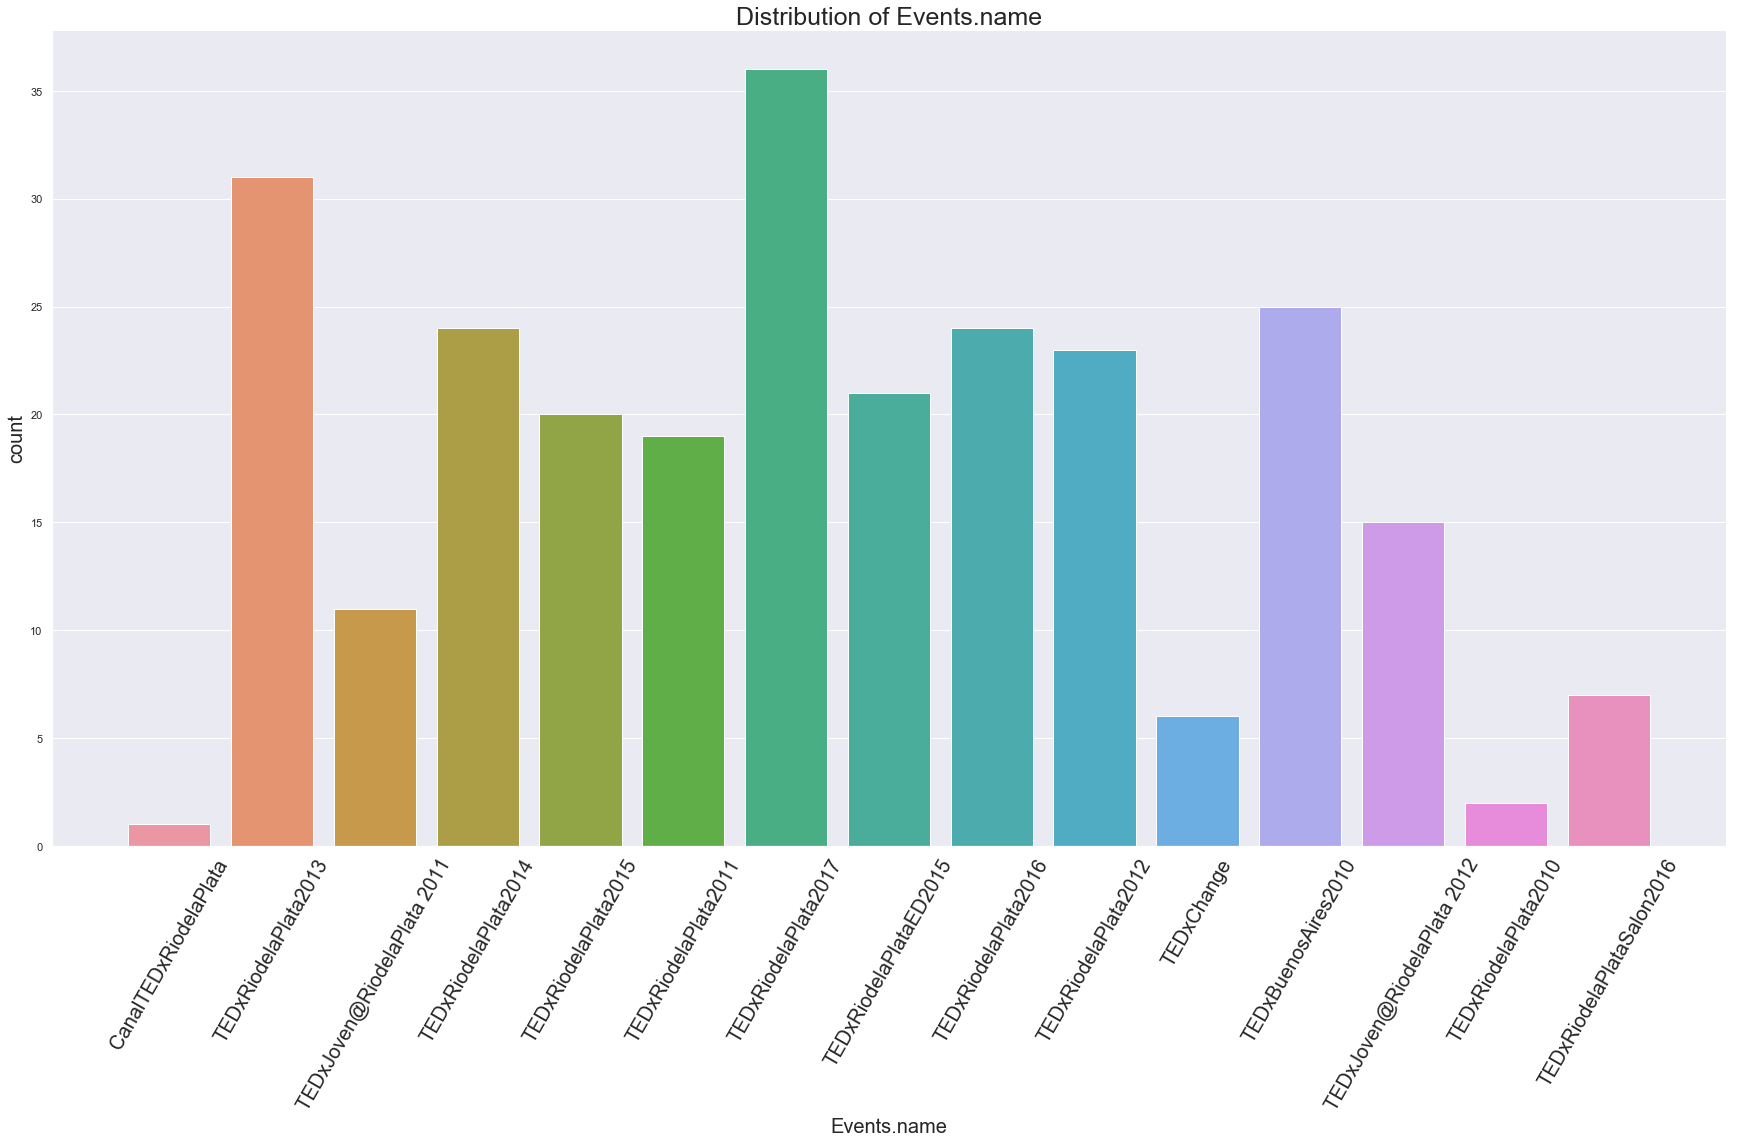

In [243]:
graph_categorical_dist('Events.name', rotation=60)

Let's check distribution of channels

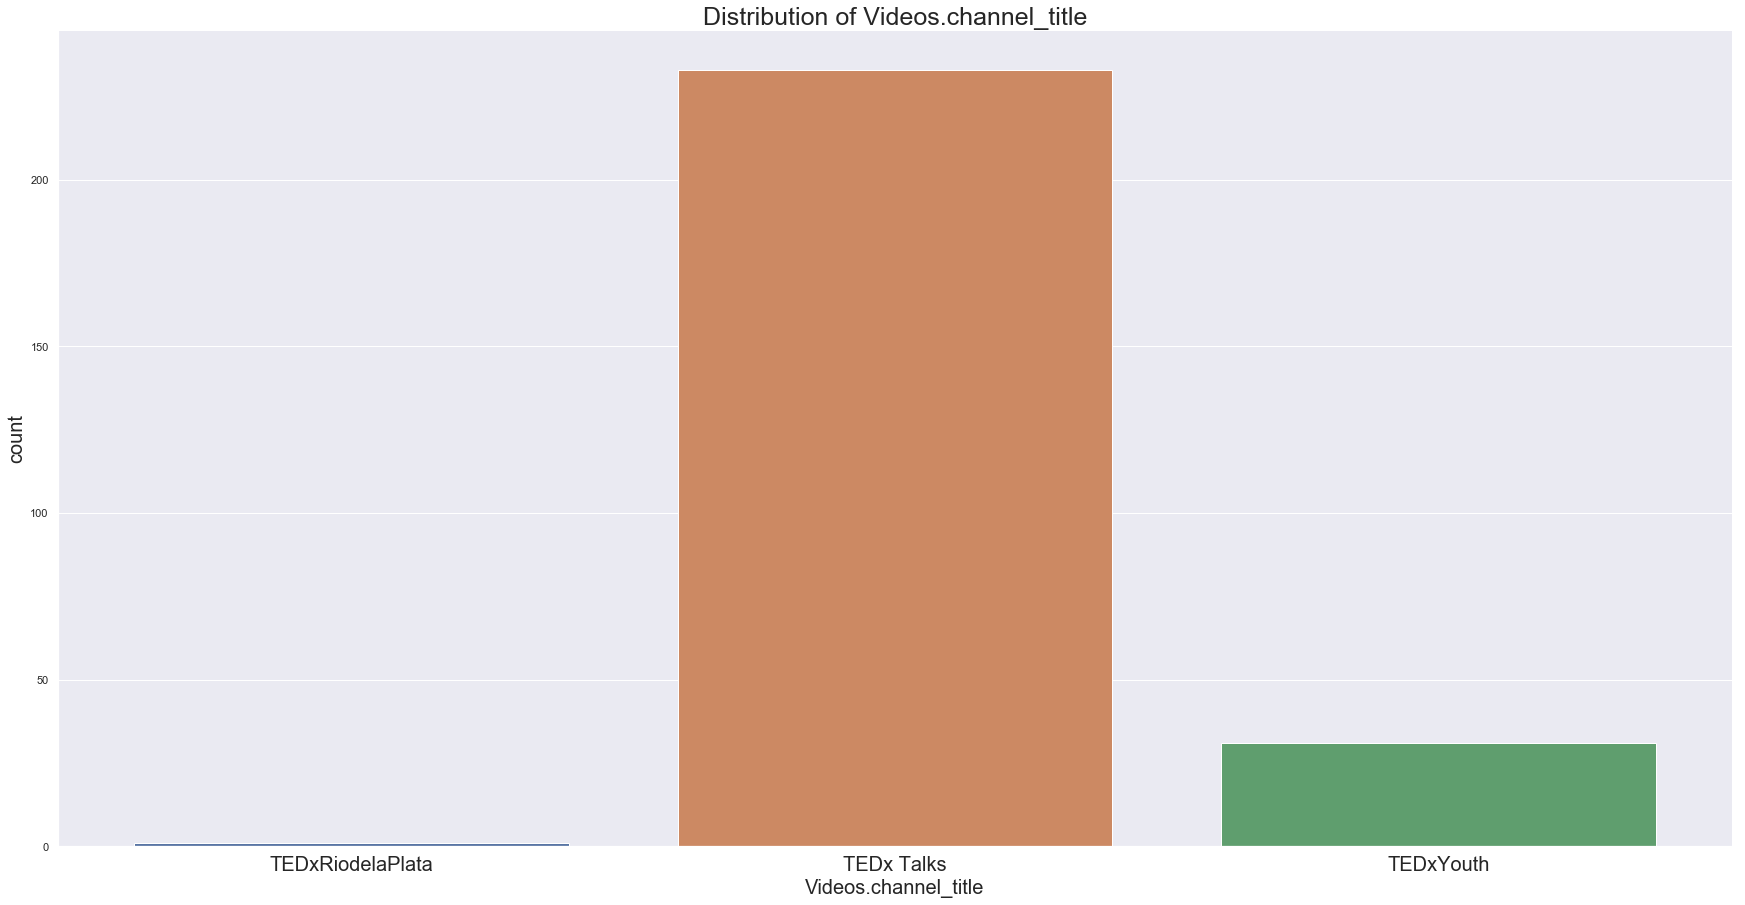

In [244]:
graph_categorical_dist('Videos.channel_title')

In [10]:
df = df.drop(['Videos.videoid','Videos.url', 'Videos.description','Videos.users_id', 'Videos.published_at', 'Videos.channelid', 'Videos.channel_title','Videos.modified'], axis=1)

In [11]:
df.columns = ['event_name', 'video_id', 'title', 'url_thumb',
       'tags', 'view_count', 'like_count',
       'dislike_count', 'comment_count', 'created']
df.head()

,event_name,video_id,title,url_thumb,tags,view_count,like_count,dislike_count,comment_count,created
0,CanalTEDxRiodelaPlata,72321a94-f58e-47a2-9071-40a5ae54091e,Flash Mob en TEDxRiodelaPlata 2013 - El Brindi...,https://i.ytimg.com/vi/qJzRzdsGhC0/hqdefault.jpg,NaN,2535385,13638,247,638,2017-12-06 18:32:44
1,TEDxRiodelaPlata2013,ea1705b1-2eb7-4782-a9d3-4f88fcc0de5a,Nunca pidas permiso | Ronald Shakespear | TEDx...,https://i.ytimg.com/vi/EFdEmbuikOw/hqdefault.jpg,"Diseño,TEDx,Español,tedx talks,Logos,tedx,Hist...",1449486,14672,957,651,2017-10-06 13:54:54
2,TEDxJoven@RiodelaPlata 2011,54489a1b-12e8-4e5a-b9aa-bba37452309d,Sobre fideos y jabones: Luciano Mellera at TED...,https://i.ytimg.com/vi/nZV1uefYywI/hqdefault.jpg,"Luciano,Mellera,Argentina,Buenos Aires,Spanish...",1037443,5648,233,256,2017-12-04 16:50:37
3,TEDxRiodelaPlata2014,e5a40182-5cec-4e28-afe6-784750a83cd3,Las matematicas son para siempre | Eduardo Sae...,https://i.ytimg.com/vi/jej8qlzlAGw/hqdefault.jpg,"tedx talk,Science (hard),Culture,Spanish,Mathe...",902644,28715,283,607,2017-10-06 13:54:58
4,TEDxRiodelaPlata2015,ea927c7b-c454-4fa4-ae54-86900daa0fff,Secretos de la relación corazón-cerebro | Luci...,https://i.ytimg.com/vi/c1iMoel2LxA/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Science (hard),Bra...",879428,14275,498,198,2017-10-06 13:55:08


From "Engagement and Popularity Dynamics of YouTube Videos and Sensitivity to Meta-Data":
`Meta features from thumbnails: blurriness (e.g., CannyEdge, Laplace Frequency), brightness, contrast (e.g., tone), overexposure, and entropy of the thumbnail.`
blurriness: `https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

Saturacion, profundidad de campo, balance de blancos, r, g y b, ruido, 

In [12]:
df['blurriness'] = 0.0
df['brightness'] = 0.0
df['contrast'] = 0.0  # HOW?!
df['overexposure'] = 0.0  # HOW?
df['entropy'] = 0.0
df['avg_color'] = np.empty((len(df), 0)).tolist()

In [13]:
def blurriness(path):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(image, cv2.CV_64F).var()


def brightness(path):
    image = Image.open(path)
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

def avg_color(path):
    img = Image.open(path)
    width, height = img.size

    r_total = 0
    g_total = 0
    b_total = 0

    count = 0
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            r_total += r
            g_total += g
            b_total += b
            count += 1

    return (r_total/count, g_total/count, b_total/count)

def entropy(path):
    rgbImg = io.imread(path)
    grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
    return sklearn_entropy(grayImg)

In [14]:
for i, row in df.iterrows():
    name = row['url_thumb'].split('/')[-2]
    link = row['url_thumb']
    path = "data/thumbnails/%s.jpg" % name
    urlretrieve(link, path)
    clear_output(wait=True)
    print("Retrieved %s: %d" % (name, i))
    df.at[i, 'blurriness'] = blurriness(path)
    print("Computed blurriness %s: %d" % (name, i))
    df.at[i, 'brightness'] = brightness(path)
    print("Computed brightness %s: %d" % (name, i))    
    df.at[i, 'avg_color'] = avg_color(path)
    print("Computed avg_color %s: %d" % (name, i))
    df.at[i, 'entropy'] = entropy(path)
    print("Computed entropy %s: %d" % (name, i))

Retrieved M-QkaJSMR9M: 264
Computed blurriness M-QkaJSMR9M: 264
Computed brightness M-QkaJSMR9M: 264
Computed avg_color M-QkaJSMR9M: 264
Computed entropy M-QkaJSMR9M: 264


From "Engagement and Popularity Dynamics of YouTube Videos and Sensitivity to Meta-Data": 
`word count, punctuation count, character count, Google hits (e.g., if the title is entered into the Google search engine how many results are found), and the Sentiment/Subjectivity of the title computed using Vader [30], and TextBlob.`


In [16]:
df.title.sample(10)

142    Bullying -- de la culpa a la vergüenza | Paula...
219    Mis alumnos y las calles del pueblo | Miguel Á...
29     Te invito a creer: Manuel Lozano at TEDxRiodel...
254    Transformar la educación en América Latina | G...
31     La puerta equivocada | Adrián Paenza | TEDxRio...
127    Los reflejos emocionales | Hernán Laperuta | T...
50     No todo es puro verso | Cristina Domenech | TE...
131    TEDxBuenosAires - Marcelo Moguilevsky  - 04/08/10
168    ¿De qué hablan los delfines? | Marcelo Magnasc...
148    TEDxBuenosAires - Mercedes Salado Puerto - 04/...
Name: title, dtype: object

In [86]:
df['word_count'] = 0
df['punctuation_count'] = 0
df['character_count'] = 0
df['google_hits'] = 0
df['sentiment_vader'] = 0.0
df['sentiment_blob_polarity'] = 0.0
df['sentiment_blob_subjectivity'] = 0.0

In [92]:
def get_hits(searchfor):
    try:
        r = requests.get('http://www.google.com/search',
                         params={'q':'%s' % searchfor,
                                 "tbs":"li:1", # Google doesn't guess for alternative searchs
                                "hl": 'en'}
                        )
        time.sleep(3)  # So google doesn't think we're bots. Wait, but we are...
        soup = BeautifulSoup(r.text, "lxml")
        hits_string = soup.find('div',{'id':'resultStats'}).text
        hits = int(''.join([c for c in hits_string if c.isdigit()]))
    except Exception as e:
        print(e)
        print(searchfor)
        print(hits_string)
        raise e
    if hits == -1:
        print(r)
        print(hits_string)
    return hits

In [94]:
words_series = df.title.str.strip().str.split('[\W_]+')
analyzer = SentimentIntensityAnalyzer()
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
for i, row in df.iterrows():
    df.at[i, 'word_count'] = len(list(filter(None, words_series.loc[i])))
    df.at[i, 'punctuation_count'] = count(row['title'],set(string.punctuation))
    df.at[i, 'character_count'] = len(row['title'])
    if row['google_hits'] <= 0: # Sensitive, let's not recalculate in case google shuts our ip down.
        df.at[i, 'google_hits'] = get_hits(row['title'])
        df.to_csv("draft_saved_just_in_case.csv")
    df.at[i, 'sentiment_vader'] = analyzer.polarity_scores(row['title'])['compound']
    df.at[i, 'sentiment_blob_polarity'] = TextBlob(row['title']).sentiment.polarity
    df.at[i, 'sentiment_blob_subjectivity'] = TextBlob(row['title']).sentiment.subjectivity
    clear_output(wait=True)
    print(i, row['title'], df.at[i, 'google_hits'])


264 Performance | Saxaje | TEDxRiodelaPlataED 8230000000


In [98]:
# df.to_csv('data/processed_v1.csv')

In [102]:
# df = pd.read_csv("data/processed_v1.csv", index_col=[0])

Let's check distribution for the sentiment analysis.

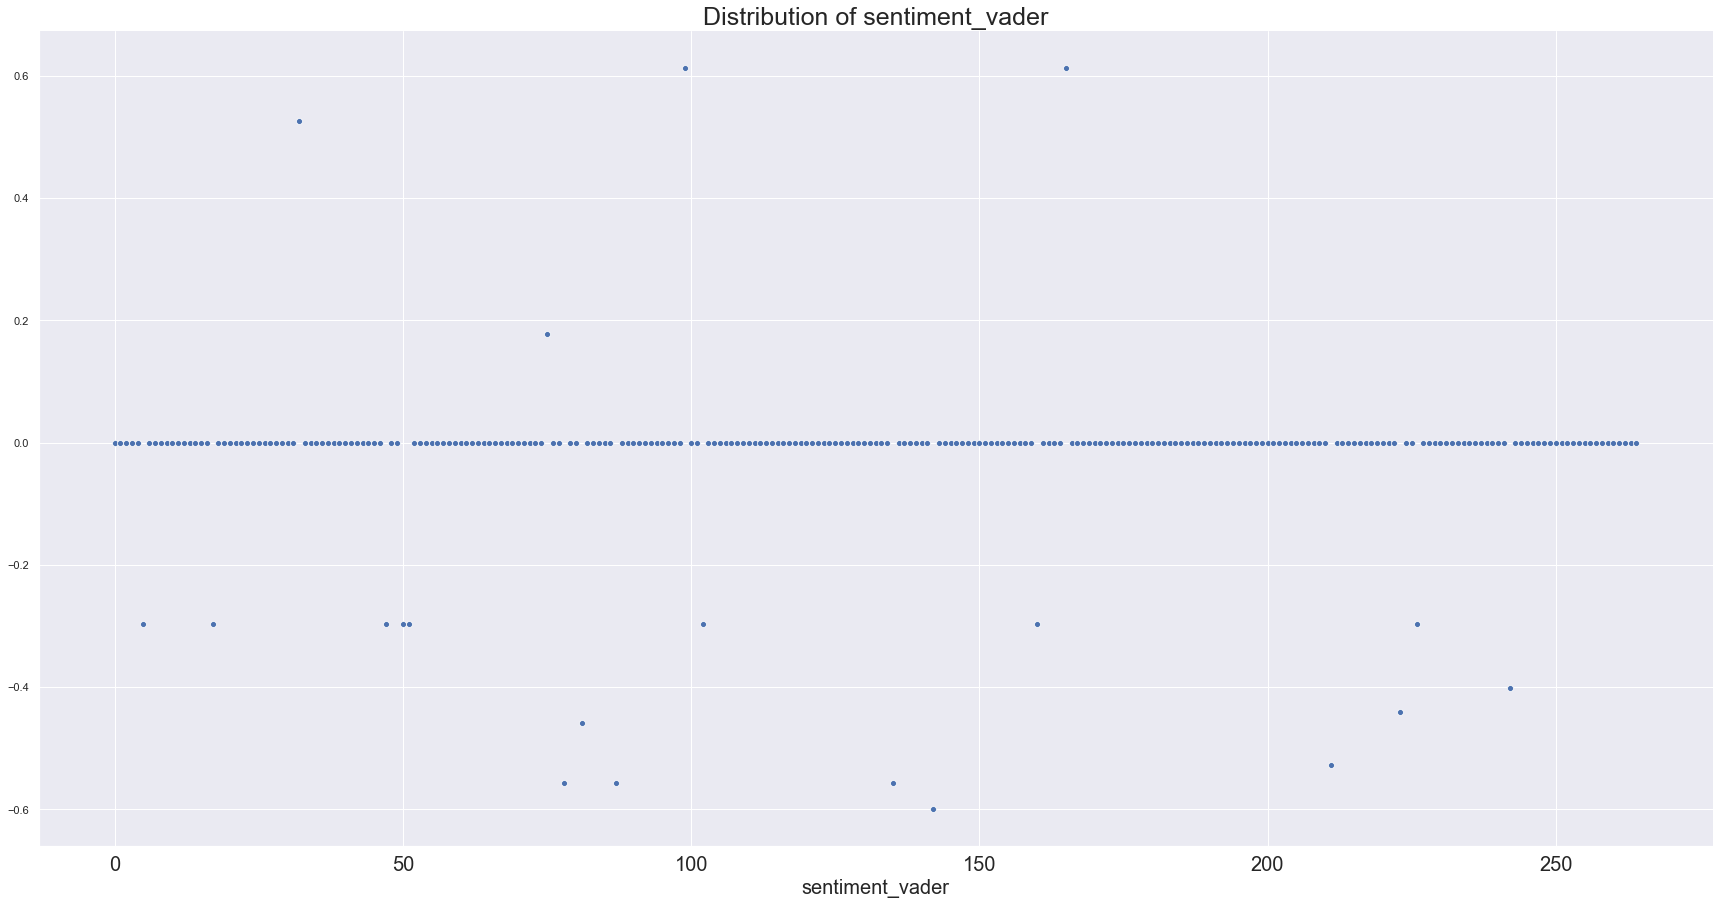

In [200]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.scatterplot(data=df.sentiment_vader)
plt.xlabel('sentiment_vader', fontsize=20)
plt.title('Distribution of sentiment_vader', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
sns.despine()
plt.plot();


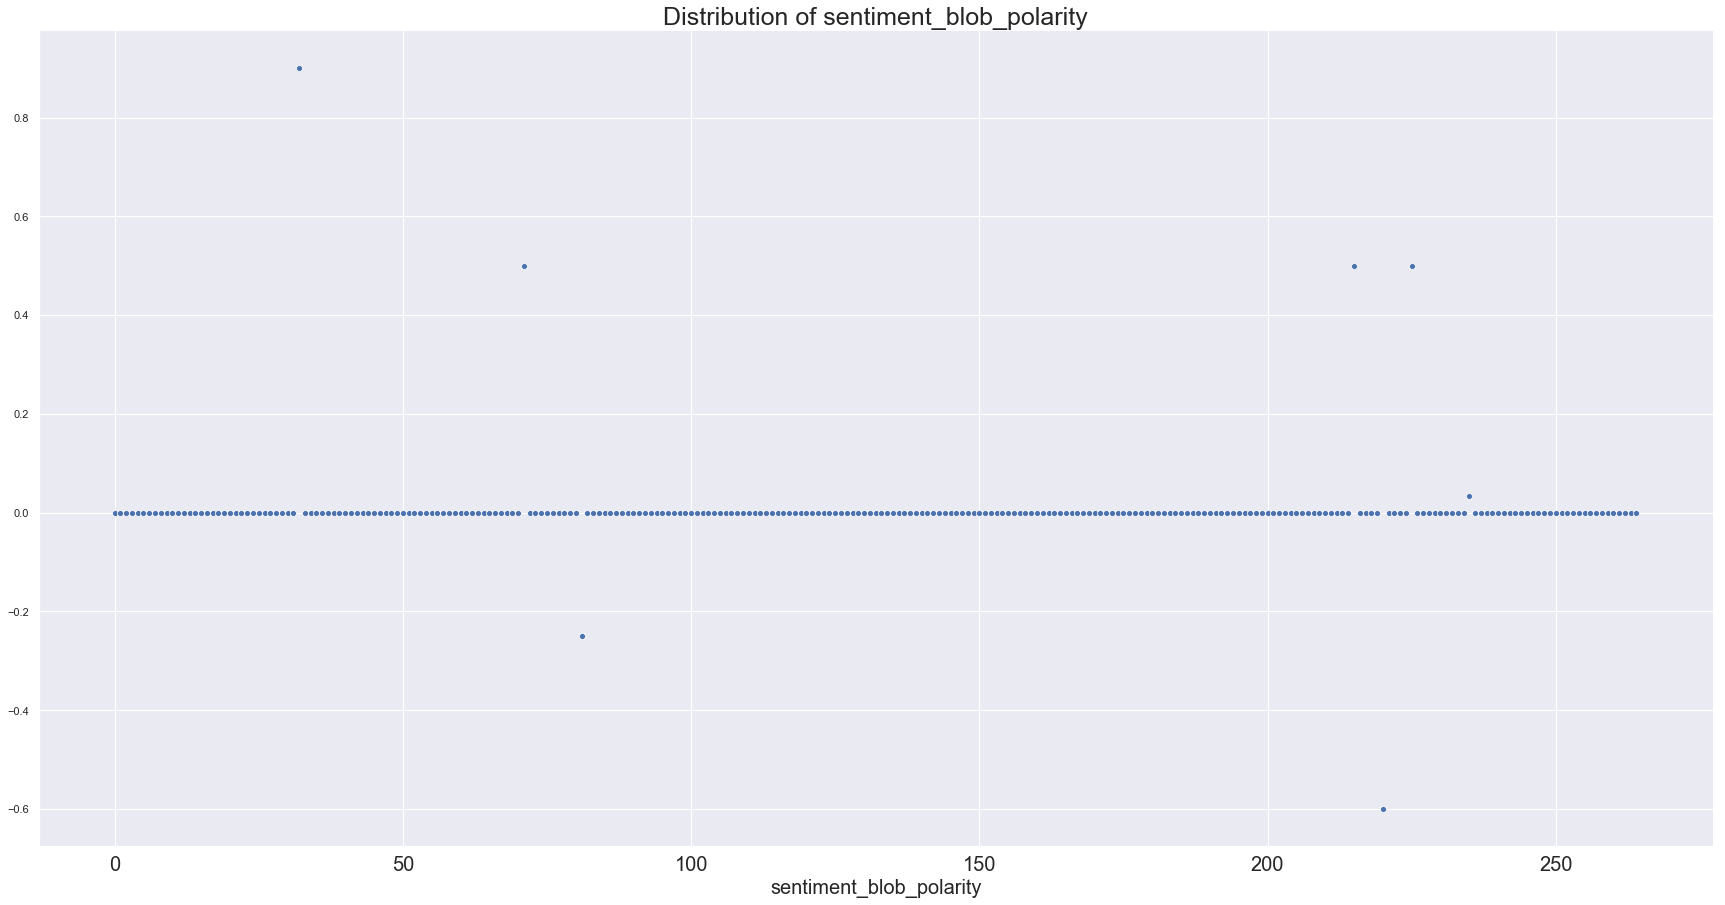

In [202]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.scatterplot(data=df.sentiment_blob_polarity)
plt.xlabel('sentiment_blob_polarity', fontsize=20)
plt.title('Distribution of sentiment_blob_polarity', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
sns.despine()
plt.plot();

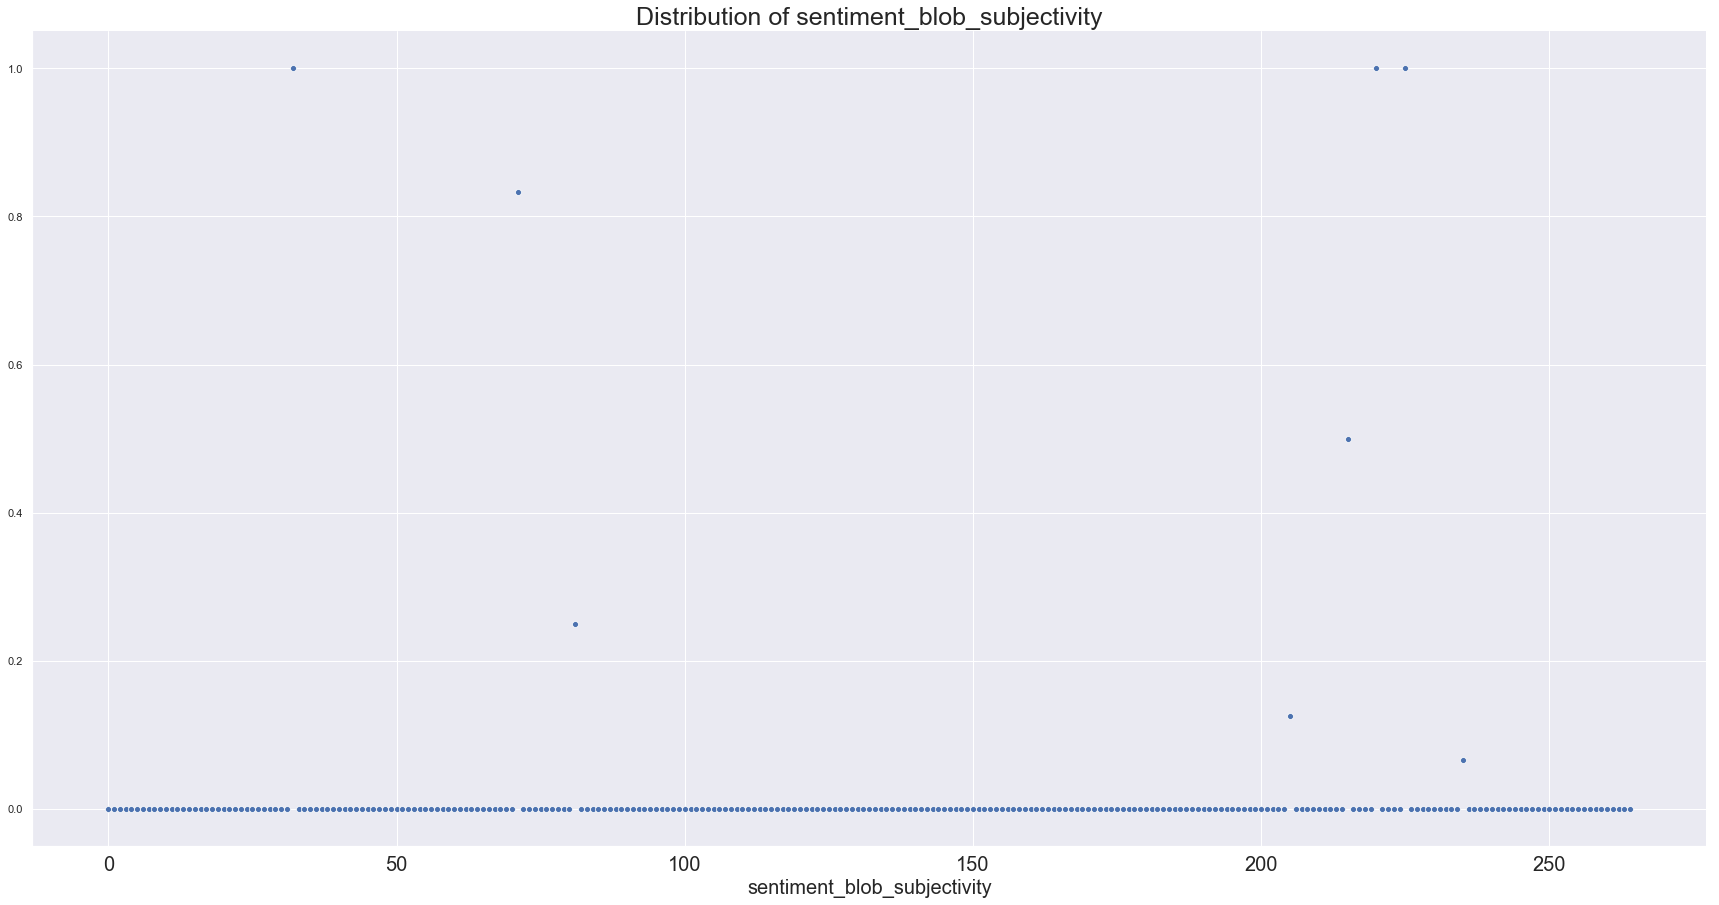

In [203]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.scatterplot(data=df.sentiment_blob_subjectivity)
plt.xlabel('sentiment_blob_subjectivity', fontsize=20)
plt.title('Distribution of sentiment_blob_subjectivity', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
sns.despine()
plt.plot();

Not very useful... let's leave it at that for the moment

From "Engagement and Popularity Dynamics of YouTube Videos and Sensitivity to Meta-Data": 

`For the Keywords, seven meta-level features are computed which include: the number of keywords, and keyword length`

In [185]:
df['tags'] = df['tags'].apply(str).apply(lambda x: '' if x=='nan' else x)

In [191]:
df['n_keywords'] = 0
df['keyword_length'] = 0.0

In [192]:
for i, row in df.iterrows():
    if row['tags']:
        tags = row['tags'].split(',')
        df.at[i, 'n_keywords'] = len(tags)
        df.at[i, 'keyword_length'] = sum( map(len, tags) ) / len(tags)
        clear_output(wait=True)
        print(i, row['title'], sum( map(len, tags) ) / len(tags))

264 Performance | Saxaje | TEDxRiodelaPlataED 9.4


From "Engagement and Popularity Dynamics of YouTube Videos and Sensitivity to Meta-Data": 

`In addition, to the above 49 meta-level features, we also include auxiliary user meta-level features including: the number of subscribers, resolution of the thumbnail used, category of the video, the length of the video, and the first day view count of the video. `

In [195]:
df.columns

Index(['event_name', 'video_id', 'title', 'url_thumb', 'tags', 'view_count',
       'like_count', 'dislike_count', 'comment_count', 'created', 'blurriness',
       'brightness', 'contrast', 'overexposure', 'entropy', 'avg_color',
       'word_count', 'punctuation_count', 'character_count', 'google_hits',
       'sentiment_vader', 'sentiment_blob_polarity',
       'sentiment_blob_subjectivity', 'n_keywords', 'keyword_length'],
      dtype='object')

In [18]:
df['created'] = pd.to_datetime(df['created'])
df['created_day'] = [d.day for d in df['created']]
df['created_month'] = [d.month for d in df['created']]
df['created_year'] = [d.year for d in df['created']]
df['created_hour'] = [d.hour for d in df['created']]
df['created_minute'] = [d.minute for d in df['created']]
df['created_second'] = [d.second for d in df['created']]

In [20]:
#df.to_csv('data/processed_v2.csv')

In [246]:
# df = pd.read_csv("data/processed_v2.csv", index_col=[0])

# Let's start analyzing and doing stuff. Add features later.

In [247]:
df = df.drop(['video_id', 'title', 'url_thumb', 'tags', 'created'], axis=1)

Split color

In [248]:
df[['avg_color_r', 'avg_color_g', 'avg_color_b']] = df['avg_color'].apply(eval).apply(pd.Series)

In [249]:
df = df.drop(['avg_color'], axis=1)

One hot encode event

In [250]:
df.event_name.unique()

array(['CanalTEDxRiodelaPlata', 'TEDxRiodelaPlata2013',
       'TEDxJoven@RiodelaPlata 2011', 'TEDxRiodelaPlata2014',
       'TEDxRiodelaPlata2015', 'TEDxRiodelaPlata2011',
       'TEDxRiodelaPlata2017', 'TEDxRiodelaPlataED2015',
       'TEDxRiodelaPlata2016', 'TEDxRiodelaPlata2012', 'TEDxChange',
       'TEDxBuenosAires2010', 'TEDxJoven@RiodelaPlata 2012',
       'TEDxRiodelaPlata2010', 'TEDxRiodelaPlataSalon2016'], dtype=object)

In [251]:
df = pd.get_dummies(df, prefix=['event'], columns=['event_name'])

In [252]:
df.columns = ['view_count', 'like_count', 'dislike_count', 'comment_count',
       'blurriness', 'brightness', 'contrast', 'overexposure', 'entropy',
       'word_count', 'punctuation_count', 'character_count', 'google_hits',
       'sentiment_vader', 'sentiment_blob_polarity',
       'sentiment_blob_subjectivity', 'n_keywords', 'keyword_length',
       'created_day', 'created_month', 'created_year', 'created_hour',
       'created_minute', 'created_second', 'avg_color_r', 'avg_color_g',
       'avg_color_b', 'event_CanalTEDxRiodelaPlata',
       'event_TEDxBuenosAires2010', 'event_TEDxChange',
       'event_TEDxJoven@RiodelaPlata2011',
       'event_TEDxJoven@RiodelaPlata2012', 'event_TEDxRiodelaPlata2010',
       'event_TEDxRiodelaPlata2011', 'event_TEDxRiodelaPlata2012',
       'event_TEDxRiodelaPlata2013', 'event_TEDxRiodelaPlata2014',
       'event_TEDxRiodelaPlata2015', 'event_TEDxRiodelaPlata2016',
       'event_TEDxRiodelaPlata2017', 'event_TEDxRiodelaPlataED2015',
       'event_TEDxRiodelaPlataSalon2016']

In [253]:
y = df.view_count
X = df[df.columns[1:]]

From "Engagement and Popularity Dynamics of YouTube Videos and Sensitivity to Meta-Data": 

`Models: he machine learning methods we utilize include: the Extreme Learning Machine(ELM), Feed-Forward   Neural   Network (FFNN), Stacked  Auto-Encoder  Deep  Neural-Network , Elasticnet, Lasso, Relaxed Lasso , Quantile Regression with Lasso, Conditional Inference Random Forest (CIRF), Boosted Generalized Additive Model, Bagged MARS using gCV Pruning, Generalized Linear Model with Stepwise Feature Selection using Akaike information criterion, and Spike and Slab Regression.`

In [254]:
from sklearn_extensions.extreme_learning_machines.elm import ELMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from pygam import LinearGAM
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [255]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'view_count').index
columns

Index(['view_count', 'comment_count', 'like_count', 'dislike_count',
       'event_CanalTEDxRiodelaPlata', 'created_month', 'word_count',
       'created_second', 'event_TEDxJoven@RiodelaPlata2011', 'created_minute'],
      dtype='object')

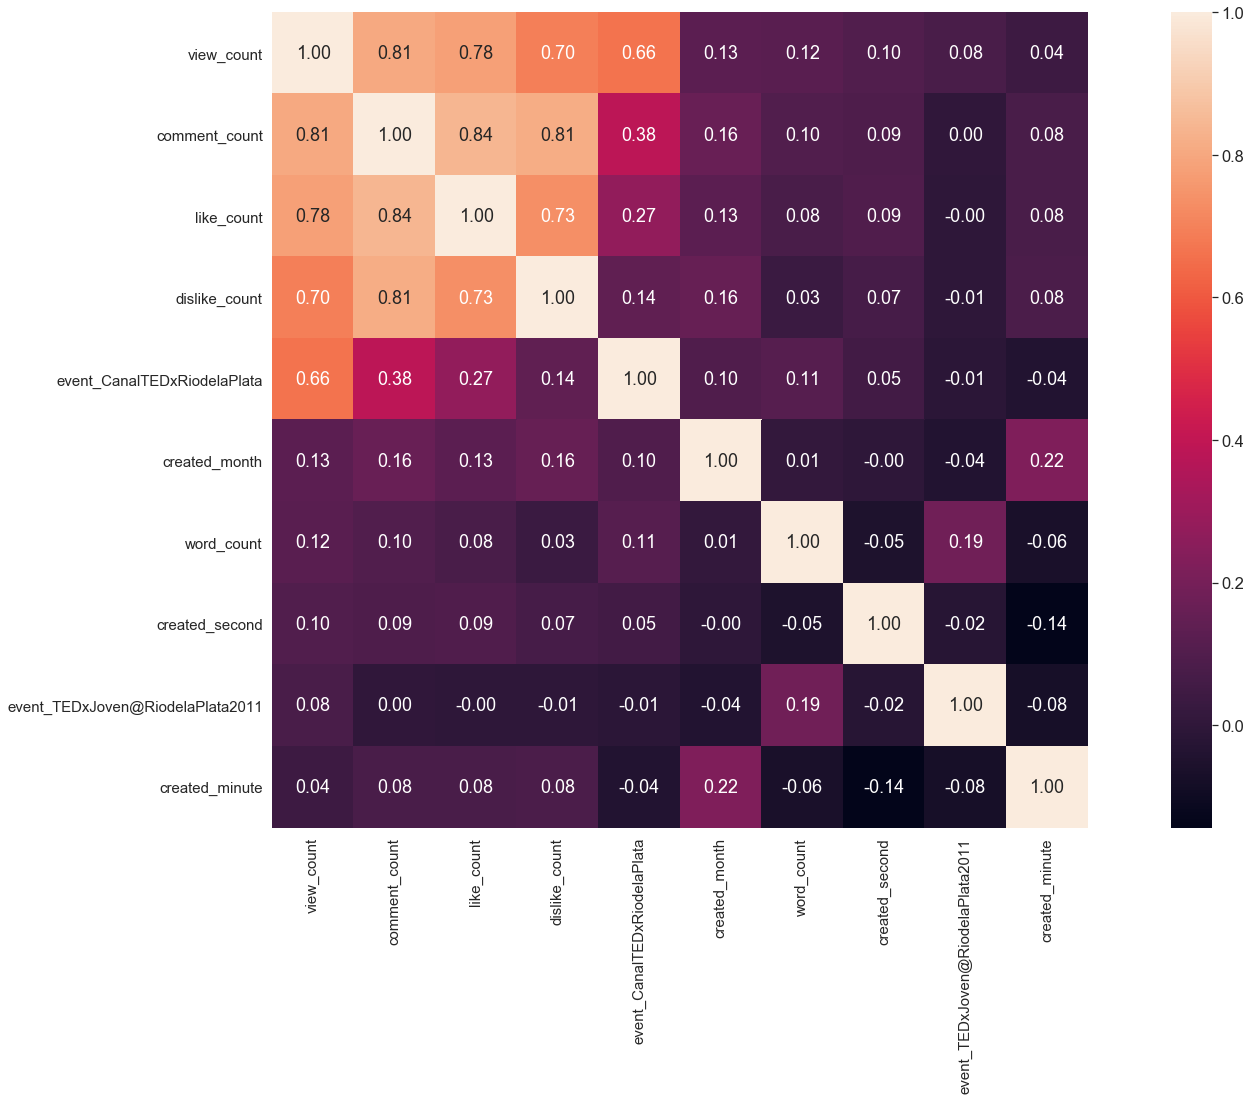

In [258]:
correlation_map = np.corrcoef(df[columns].values.T)    
fig, ax = plt.subplots(figsize=(30,15))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
plt.show()

We don't have a lot of correlated features

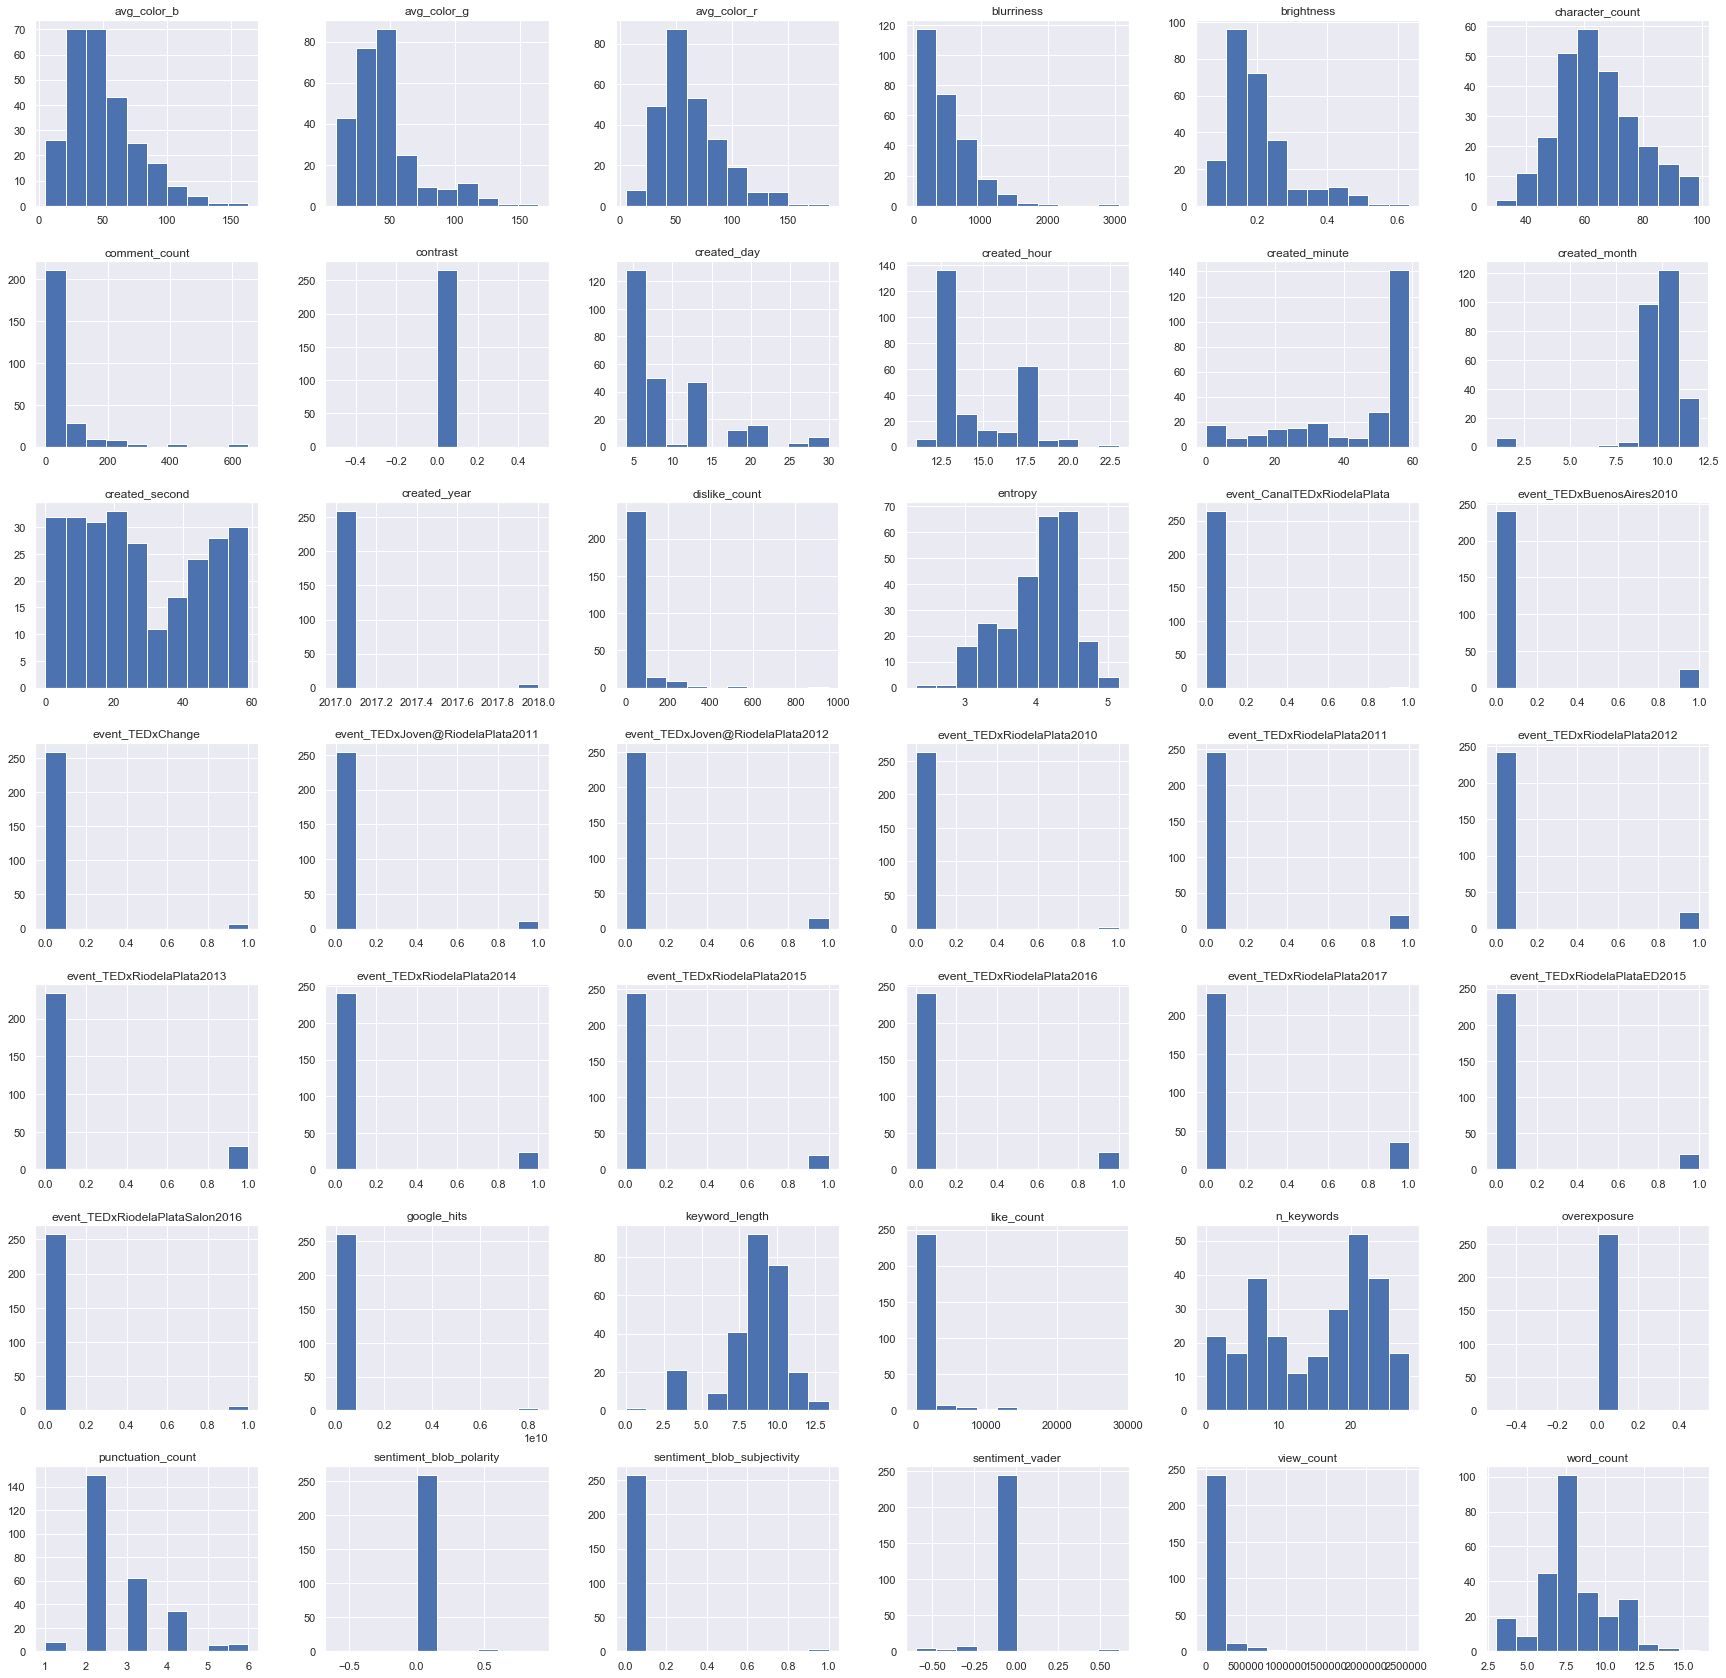

In [215]:
df.hist(figsize=(30,30));

In [216]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)

In [218]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalery = StandardScaler()
X_train = scalerX.fit_transform(X_train)
y_train = scalery.fit_transform(y_train.reshape(-1, 1))
X_test = scalerX.fit_transform(X_test)
y_test = scalery.fit_transform(y_test.reshape(-1, 1))

Let's check performance of the different models

In [220]:
models = [
    ("ELMRegressor", ELMRegressor()), ("ElasticNet", ElasticNet()), ("Lasso", Lasso()), 
    ("LinearRegression", LinearRegression()), ("GradientBoostingRegressor", GradientBoostingRegressor()), 
    ("GradientBoostingRegressor w/quantile loss", GradientBoostingRegressor(loss='quantile')), 
    ("LinearGAM", LinearGAM()), ("AdaBoostRegressor", AdaBoostRegressor()), ("XGBRegressor", XGBRegressor()), 
    ("DecisionTreeRegressor", DecisionTreeRegressor()), ("KNeighborsRegressor", KNeighborsRegressor())
]

import warnings
warnings.filterwarnings('ignore')

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print("Best model: %s" % str(sorted(list(zip(results, names)), key=lambda tup: tup[0], reverse=True)[0]))

ELMRegressor: -0.889908 (1.012574)
ElasticNet: -0.809974 (1.318992)
Lasso: -1.010317 (1.393977)
LinearRegression: -0.454327 (0.810584)
GradientBoostingRegressor: -0.308878 (0.634281)
GradientBoostingRegressor w/quantile loss: -0.353544 (0.509432)
LinearGAM: -0.760800 (1.079107)
AdaBoostRegressor: -0.420131 (0.634911)
XGBRegressor: -0.312693 (0.680793)
DecisionTreeRegressor: -0.929138 (1.286812)
KNeighborsRegressor: -0.684558 (1.000135)
Best model: (-0.30887841110299236, 'GradientBoostingRegressor')


Grid search for hyperparameters:

In [222]:
from sklearn.model_selection import GridSearchCV


param_grid = dict(n_estimators=np.array([50,100,200,300,400]), 
                  loss=['ls', 'lad', 'huber', 'quantile'], 
                  learning_rate=np.array([0.1, 0.05, 0.01]), 
                  max_depth=np.array([3,5,10]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



-0.291833 (0.633911) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 50}
-0.289982 (0.632731) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 100}
-0.289588 (0.632717) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 200}
-0.289528 (0.632892) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 300}
-0.289590 (0.633003) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 400}
-0.603071 (1.126002) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'n_estimators': 50}
-0.603566 (1.125133) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'n_estimators': 100}
-0.603530 (1.125008) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'n_estimators': 200}
-0.603528 (1.125006) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'n_estimators': 300}
-0.603528 (1.125006) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'n_estimators

So

In [223]:
model = GradientBoostingRegressor(**grid_result.best_params_)

In [224]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [225]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.36232661107619896


In [226]:
compare = pd.DataFrame({'Prediction': y_pred, 'Test Data' : y_test.flatten()})
compare.head(10)

,Prediction,Test Data
0,-0.349741,-0.529010
1,-0.338426,-0.419116
2,-0.153162,-0.363055
3,2.322078,0.984878
4,1.885398,3.303815
5,-0.370476,-0.475171
6,-0.377834,-0.585905
7,-0.046461,0.097545
8,-0.349484,-0.536913
9,-0.326438,-0.444637


Let's descale

In [230]:
actual_y_test = scalery.inverse_transform(y_test).flatten()
actual_predicted = scalery.inverse_transform(y_pred)
diff = abs(actual_y_test - actual_predicted)

compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted views' : actual_predicted, 'Difference' : diff})

compare_actual = compare_actual.astype(int)
compare_actual[['Test Data', 'Predicted views', 'Difference']].head(10)

,Test Data,Predicted views,Difference
0,9978,37085,27107
1,26595,38796,12201
2,35072,66809,31737
3,238892,441089,202197
4,589537,375059,214477
5,18119,33949,15830
6,1375,32837,31462
7,104719,82943,21775
8,8783,37124,28341
9,22736,40608,17872


In [228]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
important_features_dict = {}
for x,i in zip(X.columns, model.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

for feature in important_features_list:
    print("%s: %f" % (feature, important_features_dict[feature]))

like_count: 0.157566
comment_count: 0.083433
dislike_count: 0.068754
entropy: 0.067336
blurriness: 0.060509
n_keywords: 0.054015
keyword_length: 0.049715
avg_color_r: 0.049344
avg_color_b: 0.048850
avg_color_g: 0.048818
character_count: 0.046719
google_hits: 0.042824
created_second: 0.040307
created_minute: 0.034012
brightness: 0.028513
created_hour: 0.019080
punctuation_count: 0.014174
sentiment_vader: 0.013227
word_count: 0.011739
created_day: 0.008017
created_month: 0.007740
event_TEDxRiodelaPlata2017: 0.006784
event_TEDxRiodelaPlata2012: 0.006389
event_TEDxRiodelaPlata2016: 0.005892
event_TEDxRiodelaPlata2013: 0.004568
event_TEDxBuenosAires2010: 0.003785
event_TEDxRiodelaPlataED2015: 0.003708
sentiment_blob_polarity: 0.003611
event_TEDxJoven@RiodelaPlata2012: 0.002403
event_TEDxJoven@RiodelaPlata2011: 0.002388
event_TEDxRiodelaPlata2011: 0.002077
sentiment_blob_subjectivity: 0.001431
event_TEDxRiodelaPlata2015: 0.000678
event_TEDxChange: 0.000671
event_TEDxRiodelaPlata2014: 0.00061

Some heavy reengineering in the features need to be done.